# Introduction to machine learning

*Maxime Sangnier*

Fall, 2022

## Practical session 7: Principal component analysis

# Table of contents
1. [Principal component analysis](#part1)
1. [Kernel principal component analysis](#part2)
    - [An illustrative example](#part2sec1)
    - [The preimage problem](#part2sec2)
1. [Manifold learning](#part3)


In [1]:
from mllab import *

# Principal component analysis <a id="part1"></a>
>Load [this dataset](https://perso.lpsm.paris/~msangnier/files/pythonM2/defra_consumption.csv) in a dataframe and display it.

In [ ]:
# Answer

>Make sure that countries correspond to rows of the data matrix and center the columns.
Now, extract the row labels and the column labels.

In [ ]:
# Answer

>Apply [PCA](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) with two components and scatter the result with the help of the `scatter` function.
What can you conclude?

In [ ]:
# Answer

>Plot on the same figure:
- the eigenvalues of the second order matrix $X^\top X$;
- the eigenvalues of the Gram matrix $X X^\top$;
- the singular values of $X$.

>Are they similar?

In [ ]:
# Answer

>Define a function `pca2(X, n_components=2)`, that returns the PCA of $X$ based on the second order moment matrix.
Scatter the result and compare it to the return of [PCA](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html).

In [ ]:
# Answer

>Define a function `pcaK(X, n_components=2)`, that returns the PCA of $X$ based on the Gram matrix.
Scatter the result and compare it to the return of `pca2`.

In [ ]:
# Answer

>Since good things come in threes, do the same with SVD.

In [ ]:
# Answer

>Generate different multivariate random matrices $Z$ with shape (100, 500), (500, 100) and (500, 500), and compare the CPU time of each of the 4 methods at hand. You can use `time.clock` for measuring the elapsed time.

In [ ]:
# Answer

>Plot the curve of the ratio of explained variance versus the number of components.
How much variance is explained with 2 components?

In [ ]:
# Answer

>Recover the result with scikit-learn.

In [ ]:
# Answer

>Scatter the influence of each original variable upon the principal components. Read into the result.

In [ ]:
# Answer

**Answer:**
…

>Recover the result with scikit-learn.

In [ ]:
# Answer

# Kernel principal component analysis <a id="part2"></a>


In [5]:
from sklearn.decomposition import KernelPCA

class PreKernelPCA(object):
    def __init__(self, kernel=None, *args, **kwargs):
        """
            Adapter for kernel PCA with precomputed kernel.
        
            Input:
                kernel: kernel function
                all arguments of KernelPCA
        """
        self.kernel_fun = kernel
        self.kernelpca = KernelPCA(kernel='precomputed', *args, **kwargs)
        
    def __getattr__(self, item):
        return getattr(self.kernelpca, item)
    
    def fit(self, data):
        """
            Input:
                data: data matrix (number of individuals x dimension)
        """
        self.data = data.copy()
        return self.kernelpca.fit(self.kernel_fun(data, data))
    
    def fit_transform(self, data):
        """
            Input:
                data: data matrix (number of individuals x dimension)
        """
        self.data = data.copy()
        return self.kernelpca.fit_transform(self.kernel_fun(data, data))
    
    def transform(self, data):
        """
            Input:
                data: data matrix (number of individuals x dimension)
        """
        return self.kernelpca.transform(self.kernel_fun(data, self.data))

## An illustrative example <a id="part2sec1"></a>


>Apply a 2-principal components analysis to the following dataset.
Plot the transformed data and the level sets of the reduction method in the original space.

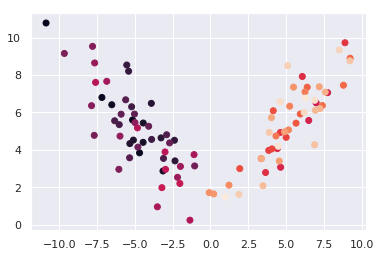

In [6]:
# Dataset
X = np.r_[gaussian_sample([-5, 5], sigma1=10, theta=-np.pi/4),
          gaussian_sample([5, 5], sigma1=10, theta=np.pi/4)]
scatter(X)

In [ ]:
# Answer

>Define the kernel associated to the feature map $\phi \colon x \in \mathbb R^2 \mapsto (x_1, \|x\|_2) \in \mathbb R^2$.
Apply a principal component analysis with this kernel and produce the same plots as before.

In [ ]:
# Answer

>Display the level set of the second component. How can you interpret the fact that the transformed data is mainly distributed along the first axis?

In [ ]:
# Answer

## The preimage problem <a id="part2sec2"></a>
>We now consider the problem of reconstructing data from its projection.
To state the problem formally, let $\phi : \mathbb R^d \to \mathbb R^D$ be a mapping function.
Kernel PCA maps a point $x \in \mathbb R^d$ to $\phi(x)$, then projects the result in $\mathbb R^p$ by computing $z = V^\top \phi(x)$, with $V \in \mathbb R^{D \times p}$.
If the kernel is linear, $\phi$ is the identity function and it is known that the linear inverse mapping that minimizes the reconstruction error is $Vz = VV^\top \phi(x) = VV^\top x \in \mathbb R^D$.

>However, if the kernel is not linear, inverting the PCA transform boils down to finding $\tilde x \in \mathbb R^d$ such that $\tilde x \in \operatorname{arg\,min}_{x' \in \mathbb R^d} \|\phi(x') - Vz\|$, which is not an easy task because of the nonlinear mapping function $\phi$.

>A way to solve this problem is to regress the original data $x$ on its projection $z$, for instance with ordinary linear regression.
In other words, we have to find a (linear) function $\psi : \mathbb R^p \to \mathbb R^d$ such that $x \approx \psi(z) = \psi(V^\top \phi(x))$.
Again, for linear PCA, this inverse mapping is no more than $\psi(z) = Vz$ and the reconstruction error is $\|x - \psi(V^\top x)\| = \|x - VV^\top x\|$.

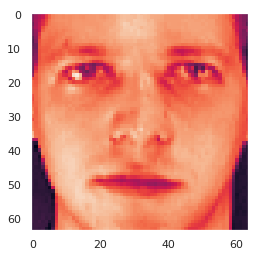

In [11]:
# Dataset
from sklearn.datasets import fetch_olivetti_faces

faces = fetch_olivetti_faces('./data/').data

plt.imshow(faces[0, :].reshape(64, -1))
plt.axis('image')
plt.grid(False)

>Perform a linear 10-principal component analysis and compute the reconstruction error.

In [ ]:
# Answer

>Show the reconstruction of the first image.

In [ ]:
# Answer

>Implement the proposed solution (ordinary linear regression) to the preimage problem in the following class.

In [14]:
class PreImKernelPCA(object):
    def __init__(self, fit_inverse_transform=None, *args, **kwargs):
        """
            Adapter for kernel PCA with linear preimage.
        
            Input:
                all arguments of KernelPCA
        """
        pass
        
    def __getattr__(self, item):
        return getattr(self.kernelpca, item)
    
    def fit(self, data):
        """
            Input:
                data: data matrix (number of individuals x dimension)
        """
        pass
    
    def fit_transform(self, data):
        """
            Input:
                data: data matrix (number of individuals x dimension)
        """
        pass
    
    def inverse_transform(self, data):
        """
            Input:
                data: data matrix (number of individuals x dimension)
        """
        pass

In [ ]:
# Answer

>Compare kernel PCA (with a Gaussian kernel) and PCA based on the reconstruction error and the visualization of the first image reconstruction.

In [ ]:
# Answer

>Does tuning the parameter $\gamma$ help in improving the reconstruction error?

In [ ]:
# Answer

>How is the preimage problem solved in kernel PCA as implemented in `scikit-learn`?

**Answer:**
…

# Manifold learning <a id="part3"></a>
>Draw a sample of 1000 points from the [swiss roll dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_swiss_roll.html) and scatter it in 3D.

In [ ]:
# Answer

>Compare [PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA), [MDS](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.MDS.html#sklearn.manifold.MDS), [ISOMAP](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.Isomap.html#sklearn.manifold.Isomap) and [t-SNE](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html#sklearn.manifold.TSNE) as dimension reduction method from 3D to 2D and scatter the new representation of the data in each case.

In [ ]:
# Answer

>Use [kernel PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.KernelPCA.html) with a Gaussian kernel and several values of $\gamma$ to perform dimension reductions.
Scatter the new representation of the data in each case.
Is it satisfactory?

In [ ]:
# Answer